In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
matplotlib.rcParams['figure.dpi']= 150
matplotlib.rcParams["svg.fonttype"] = "none"
matplotlib.rcParams['figure.figsize'] = [7, 7]
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'figure.autolayout': True})
import seaborn as sns

In [2]:
sns.set(style='whitegrid', font_scale=1.4, rc={"lines.linewidth": 1.5,'lines.markersize': 4.0, 'axes.facecolor': 'white'}, font="serif")

In [3]:
import pickle
import numpy as np
from orphics.stats import FisherMatrix
from six.moves import configparser
import six

if six.PY2:
    ConfigParser = configparser.SafeConfigParser
else:
    ConfigParser = configparser.ConfigParser

In [4]:
so_fisher_files = ['../datatest/summed_fisher_planck-abund-so-v3-goal-40.pkl',
                '../datatest/summed_fisher_planck_clustering-abias-abund-so-v3-goal-40.pkl',
                '../datatest/summed_fisher_planck_clustering-abund-so-v3-goal-40.pkl']

s4_fisher_files = ['../datatest/summed_fisher_planck_abund-s4-lsst-zlt2.pkl',
                '../datatest/summed_fisher_planck_clustering-abias-abund-s4-lsst-zlt2.pkl',
                '../datatest/summed_fisher_planck_clustering-abund-s4-lsst-zlt2.pkl']

fisher_labels = ['Ab+Pl',
                'Ab+Pl+Cl+abias',
                'Ab+Pl+Cl']

colors = ['#2e7daa', 
          '#a80639', 
          '#f7d25b']

so_fisher_list = []
for file_ in so_fisher_files:
    with open(file_, 'rb') as pickle_file:
        fishmat = pickle.load(pickle_file)
        fishmat.params = fishmat.columns.values.tolist()
        try:
            fishmat.delete('b_wl')
            #fishmat.delete('w0')
            #ishmat.delete('wa')
        except:
            print('b_wl not in this matrix')
        so_fisher_list.append(fishmat)
        
s4_fisher_list = []
for file_ in s4_fisher_files:
    with open(file_, 'rb') as pickle_file:
        fishmat = pickle.load(pickle_file)
        fishmat.params = fishmat.columns.values.tolist()
        try:
            fishmat.delete('b_wl')
            #fishmat.delete('w0')
            #ishmat.delete('wa')
        except:
            print('b_wl not in this matrix')
        s4_fisher_list.append(fishmat)

b_wl not in this matrix
b_wl not in this matrix


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [5]:
so_constraint_list = [fish.sigmas() for fish in so_fisher_list]
s4_constraint_list = [fish.sigmas() for fish in s4_fisher_list]

In [6]:
def _get_latex_params(inifile, fish_sect='fisher-clustering'):
    config = ConfigParser()
    config.optionxform=str
    config.read(inifile)

    latex_param_list = config.items(fish_sect, 'paramLatexList')[1][1].split(',')
    return latex_param_list

INI = '../input/pipeline.ini'

latex_params = _get_latex_params(INI)
latex_paramdict = {}

ordered_params = 'omch2,ombh2,H0,ns,As,mnu,w0,wa,alpha_ym,b_ym,beta_ym,gamma_ym,Ysig,gammaYsig,betaYsig'
#ordered_params = 'omch2,ombh2,H0,ns,As,mnu,alpha_ym,b_ym,beta_ym,gamma_ym,Ysig,gammaYsig,betaYsig'
ordered_params = ordered_params.split(',')
ordered_fisher = so_fisher_list[2].copy().reordered(ordered_params)
for index,key in enumerate(ordered_fisher.columns.values):
    latex_paramdict[key] = latex_params[index]

/Users/dylan/Development/orphics/orphics/stats.py:204: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  self.params = param_list


In [7]:
params_to_plot = ['H0', 'mnu', 'ombh2', 'omch2', 'w0', 'wa', 'ns']
latex_to_plot = ['$' + latex_paramdict[key] + '$' for key in params_to_plot]

In [8]:
import pandas as pd

In [18]:
so_constraint_list[2]['omch2']/s4_constraint_list[2]['omch2']

1.038190051442174

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


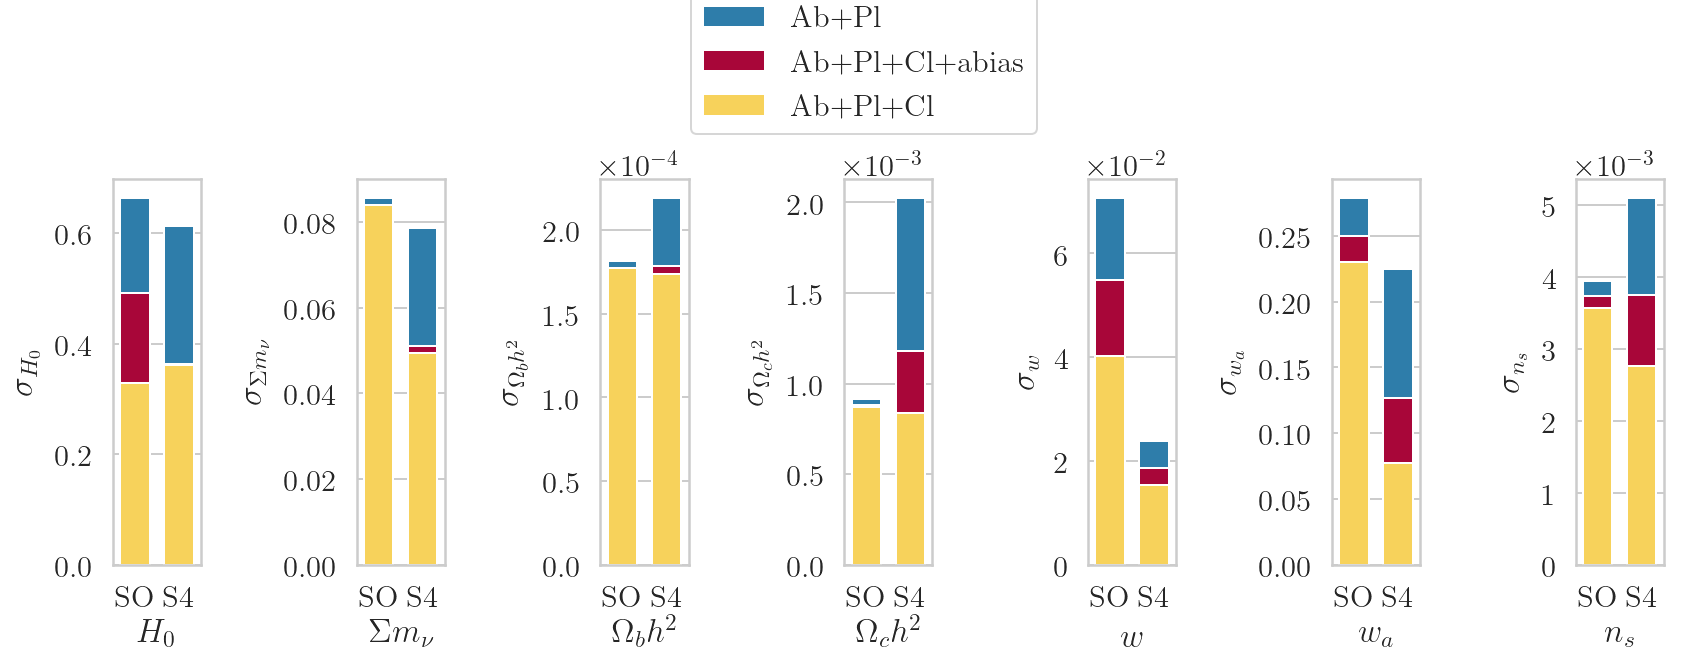

In [13]:
fig,axes = plt.subplots(1,len(params_to_plot), figsize=(12, 4))

for index,param in enumerate(params_to_plot):
    latex = '$' + latex_paramdict[param] + '$'
    wth = 1
    #sigmas = np.array([constraints_ab[param],constraints[param], oldconstraints[param]])
    
    for fish_index in range(len(so_fisher_list)):
        axes[index].bar(0, so_constraint_list[fish_index][param], width=wth, 
                        label=fisher_labels[fish_index], color=colors[fish_index])
        
    for fish_index in range(len(s4_fisher_list)):
        axes[index].bar(1.5, s4_constraint_list[fish_index][param], width=wth, 
                        color=colors[fish_index])
        
    axes[index].set_xlabel(latex)
    axes[index].xaxis.set_ticks_position('none') 
    axes[index].set_xticks((0,1.5))
    axes[index].set_xticklabels(('SO', 'S4'))
    axes[index].set_xlim(-(wth + wth/2)/2 , 1.5 +(wth + wth/2)/2)
    axes[index].set_ylabel(r'$\sigma_{'+latex_paramdict[param]+'}$')
    axes[index].grid(False, axis='x')
    
handles, labels = axes[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(.5, 0.9))
fig.tight_layout()
#fig.savefig('barplot.eps', bbox_inches='tight')

In [14]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir+'/bin') 
from deeos_to_gamma import get_gamma_constraint

In [ ]:
sigma_gamma_old = get_gamma_constraint(oldfisher, oldfisher.columns.values)
sigma_gamma = get_gamma_constraint(fisher, fisher.columns.values)
sigma_gamma_ab = get_gamma_constraint(fisher_ab, fisher_ab.columns.values)

In [ ]:
wth = 1
plt.bar(0, sigma_gamma_old, width=1, label='Pl+Ab'
                    , color='#2e7daa')
plt.bar(0, sigma_gamma_ab, width=wth, 
                label='Pl+Ab+Cl \n w/ $a_\mathrm{bias}$', color='#a80639')
plt.bar(0, sigma_gamma, width=wth, 
                label='Pl+Ab+Cl', color='#f7d25b')
plt.xlabel(r'$\gamma$')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlim(-(wth + wth/2)/2 , (wth + wth/2)/2)
plt.ylabel(r'$\sigma_{\gamma}$')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.2))
fig = plt.gcf()
fig.set_size_inches(13/7 + 1.8,4)
fig.tight_layout()
#fig.savefig('gamma_barplot.svg', bbox_inches='tight')

In [21]:
from orphics.io import dict_from_section,list_from_config
Config = ConfigParser()
Config.optionxform=str
Config.read(INI)
clttfile = Config.get('general','clttfile')
constDict = dict_from_section(Config,'constants')

fparams = {}
for (key, val) in Config.items('params'):
    if ',' in val:
        param, step = val.split(',')
        fparams[key] = float(param)
    else:
        fparams[key] = float(val)

In [22]:
latex_dict_to_plot={}
for ind,key in enumerate(params_to_plot):
    latex_dict_to_plot[key] = latex_to_plot[ind]

In [19]:
from orphics.stats import corner_plot

/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily

Saved plot to paper_cornerplot_so.pdf


/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz_18/szar/szar-env/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/dylan/Development/tsz

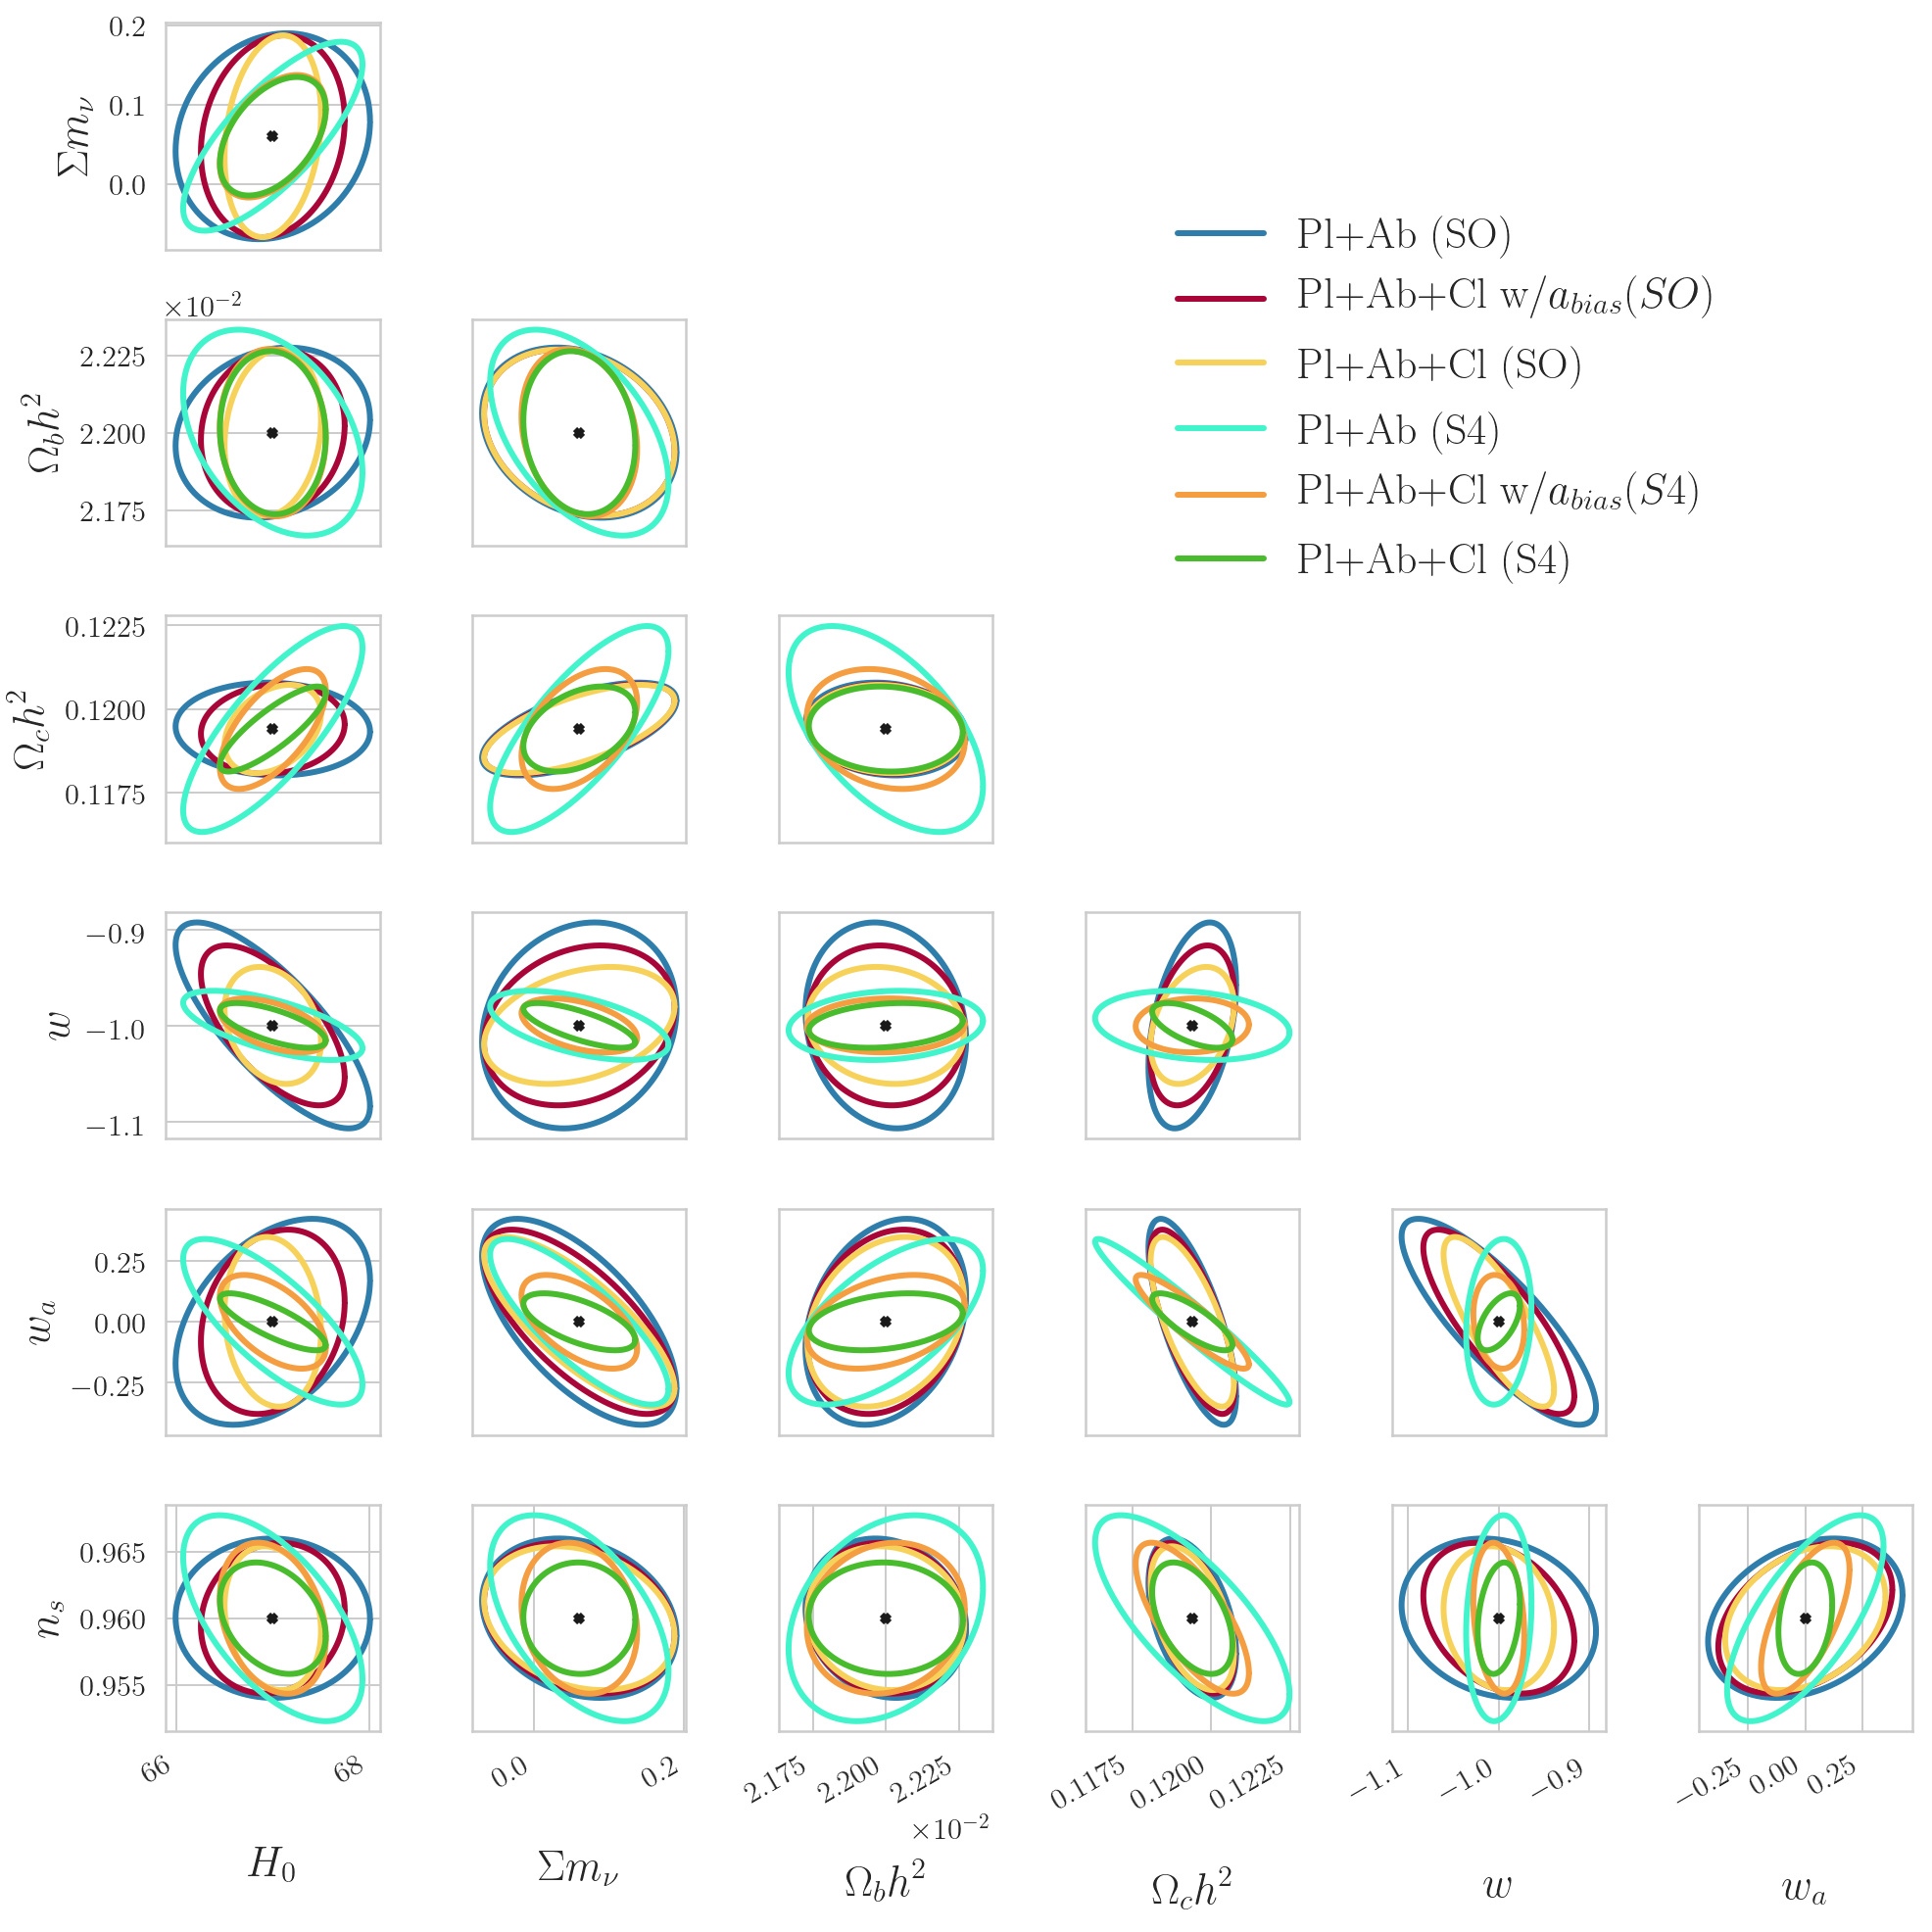

In [29]:
fishers_to_plot = so_fisher_list + s4_fisher_list
corner_labels = ['Pl+Ab (SO)', r'Pl+Ab+Cl w/$a_{bias} (SO)$', 'Pl+Ab+Cl (SO)',
                 'Pl+Ab (S4)', r'Pl+Ab+Cl w/$a_{bias} (S4)$', 'Pl+Ab+Cl (S4)']
corner_colors = ['#2e7daa','#a80639','#f7d25b', '#42f4cb', '#f49d41', '#49bc2d']
corner_plot(fishers_to_plot, corner_labels, colors=corner_colors, fid_dict=fparams, params=params_to_plot,
            show_1d=False, loc='upper right', latex_dict=latex_dict_to_plot, thk=3,
            labelsize=22, rotate_xlabels=True, xpad=30, save_file='paper_cornerplot_so.pdf',
            fileformat='pdf')

In [37]:
s4_fisher_list[0].values.mean()/so_fisher_list[0].values.mean()

1.7210746958122907

In [41]:
s4_fisher_list[0]['H0']['H0']/so_fisher_list[0]['H0']['H0']

1.797294033462101

In [45]:
s4_fisher_list[0]['omch2']

As           5.690273e+15
H0          -1.601008e+05
Ysig         1.376893e+06
alpha_ym    -1.398244e+06
b_ym         1.533557e+07
betaYsig    -6.633339e+04
beta_ym      7.943828e+05
gammaYsig    1.043684e+05
gamma_ym     3.887935e+06
mnu         -6.181685e+06
ns           1.067684e+07
ombh2       -1.739793e+08
omch2        2.192400e+08
tau          1.919442e+06
w0          -4.249870e+06
wa           1.579615e+05
Name: omch2, dtype: float64

In [48]:
so_fisher_list[1]['mnu']['mnu']/so_fisher_list[2]['mnu']['mnu']

1.0